In [1]:
#importing nesessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score,roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools

In [2]:
#reading clean dataset from part 1
df_data = pd.read_csv('DataWrangling_clean_dataset.csv', parse_dates=['Well_Status_Date','treatment_date','Spud_Date'], index_col='api')

del df_data['Unnamed: 0']
df_categories=['Current_Operator','Current_Well_Name','Well_Type', 'Well_Status', 
               'Wellbore','Lease_Name', 'Lease_Number','Original_Operator',
              'Original_Well_Name', 'County_Name', 'Township','Range','QQ',
              'Footages','Field_Name','Produced_Pools','Wellbore']

#reasigning correct datatypes
df_data[df_categories]=df_data[df_categories].astype('category')
df_data['Wellbore']=df_data['Wellbore'].astype('category')

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 33007015830000 to 33105025590000
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bottom              5846 non-null   int64         
 1   fluid_bbl           5846 non-null   int64         
 2   fluid_bbl_per_ft    5846 non-null   int64         
 3   fluid_gal           5846 non-null   int64         
 4   fluid_gal_per_ft    5846 non-null   int64         
 5   ft_per_stage        5846 non-null   int64         
 6   lateral_length      5846 non-null   int64         
 7   max_treat_press     5846 non-null   int64         
 8   max_treat_rate      5846 non-null   float64       
 9   propp_lbs           5846 non-null   int64         
 10  propp_lbs_per_ft    5846 non-null   int64         
 11  stages              5846 non-null   int64         
 12  top                 5846 non-null   int64         
 13  treatment_date      5846 

In [3]:
df_data.describe()

,bottom,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,max_treat_rate,propp_lbs,...,top,number_treatments,interval,cum_oil_365,file_no,TD,Section,Latitude,Longitude,CTB
count,5846.000000,5.846000e+03,5846.000000,5.846000e+03,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5.846000e+03,...,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5838.000000,5846.000000,5846.000000,5846.000000,5845.000000
mean,19254.924735,5.222071e+04,18.789087,2.193272e+06,810.521724,3187.875641,8677.173452,7535.160794,53.029935,2.836005e+06,...,10617.391208,1.072870,8613.667636,90107.389497,21598.178242,19290.045906,17.960486,48.009811,-102.952270,158026.535500
std,5533.251902,4.252648e+04,168.572857,1.786111e+06,7080.644950,4345.800939,5754.721194,3303.819306,380.003067,4.463609e+06,...,1441.774727,0.426046,5236.203409,50142.643689,2342.382494,2770.685693,10.447341,0.473151,0.555340,51664.200286
min,2970.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000e+00,...,866.000000,1.000000,2.000000,0.000000,16327.000000,1860.000000,1.000000,46.688459,-104.044496,116327.000000
25%,18809.250000,3.038450e+04,3.000000,1.276149e+06,165.000000,297.000000,8581.250000,7206.000000,30.000000,1.864710e+06,...,10293.000000,1.000000,8568.000000,56544.500000,19590.750000,18970.500000,9.000000,47.745391,-103.352895,120230.000000
50%,20118.000000,4.788400e+04,5.000000,2.011128e+06,233.000000,343.000000,9321.000000,8238.000000,36.000000,2.618513e+06,...,10886.500000,1.000000,9315.000000,82310.000000,21549.500000,20224.500000,18.000000,48.022384,-102.923979,123255.000000
75%,20710.000000,6.408100e+04,7.000000,2.691402e+06,318.000000,8609.000000,9678.000000,8834.000000,41.300000,3.366945e+06,...,11287.000000,1.000000,9670.000000,113571.500000,23464.750000,20780.000000,27.000000,48.283954,-102.560500,219283.000000
max,232035.000000,1.514920e+06,5265.000000,6.362664e+07,221142.000000,131211.000000,220106.000000,101956.000000,8690.000000,2.878837e+08,...,20857.000000,9.000000,220106.000000,501036.000000,27543.000000,26908.000000,36.000000,48.998022,-100.532257,418190.000000


In [4]:
#convert date columns to year, month, day, columns
for i in ['Well_Status_Date','treatment_date','Spud_Date']:
    print(i)
    df_data[i+'_year'] = pd.DatetimeIndex(df_data[i]).year
    df_data[i+'_month'] = pd.DatetimeIndex(df_data[i]).month
    df_data[i+'_day'] = pd.DatetimeIndex(df_data[i]).day
    del df_data[i]

Well_Status_Date
treatment_date
Spud_Date


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 33007015830000 to 33105025590000
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bottom                  5846 non-null   int64   
 1   fluid_bbl               5846 non-null   int64   
 2   fluid_bbl_per_ft        5846 non-null   int64   
 3   fluid_gal               5846 non-null   int64   
 4   fluid_gal_per_ft        5846 non-null   int64   
 5   ft_per_stage            5846 non-null   int64   
 6   lateral_length          5846 non-null   int64   
 7   max_treat_press         5846 non-null   int64   
 8   max_treat_rate          5846 non-null   float64 
 9   propp_lbs               5846 non-null   int64   
 10  propp_lbs_per_ft        5846 non-null   int64   
 11  stages                  5846 non-null   int64   
 12  top                     5846 non-null   int64   
 13  number_treatments       5846 non-null   int64   
 14  i

In [6]:
#raplace problem data poins with mean values
df_data=df_data.replace(np.inf, np.nan)
df_dataFixedNA = df_data.fillna(df_data.mean(),inplace=False)
len(df_dataFixedNA)

5846

In [7]:
df_dataFixedNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 33007015830000 to 33105025590000
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bottom                  5846 non-null   int64   
 1   fluid_bbl               5846 non-null   int64   
 2   fluid_bbl_per_ft        5846 non-null   int64   
 3   fluid_gal               5846 non-null   int64   
 4   fluid_gal_per_ft        5846 non-null   int64   
 5   ft_per_stage            5846 non-null   int64   
 6   lateral_length          5846 non-null   int64   
 7   max_treat_press         5846 non-null   int64   
 8   max_treat_rate          5846 non-null   float64 
 9   propp_lbs               5846 non-null   int64   
 10  propp_lbs_per_ft        5846 non-null   int64   
 11  stages                  5846 non-null   int64   
 12  top                     5846 non-null   int64   
 13  number_treatments       5846 non-null   int64   
 14  i

In [8]:
#remove rows with outliers
df_no_categories=df_dataFixedNA.select_dtypes(exclude='category')
del df_no_categories['number_treatments']
df_dataFixedNAOutliers = df_no_categories[(np.abs(stats.zscore(df_no_categories)) < 3).all(axis=1)]
df_dataFixedNAOutliers = df_dataFixedNAOutliers.merge(df_dataFixedNA.select_dtypes(include='category'),left_index=True, right_index=True)
print(len(df_dataFixedNA))
print(len(df_dataFixedNAOutliers))
df_dataFixedNAOutliers.info()
#df_dataFixedNA.info()

5846
5370
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 33007016320000 to 33105025590000
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bottom                  5370 non-null   int64   
 1   fluid_bbl               5370 non-null   int64   
 2   fluid_bbl_per_ft        5370 non-null   int64   
 3   fluid_gal               5370 non-null   int64   
 4   fluid_gal_per_ft        5370 non-null   int64   
 5   ft_per_stage            5370 non-null   int64   
 6   lateral_length          5370 non-null   int64   
 7   max_treat_press         5370 non-null   int64   
 8   max_treat_rate          5370 non-null   float64 
 9   propp_lbs               5370 non-null   int64   
 10  propp_lbs_per_ft        5370 non-null   int64   
 11  stages                  5370 non-null   int64   
 12  top                     5370 non-null   int64   
 13  interval                5370 non-null   int64

Well_Status_Date_month


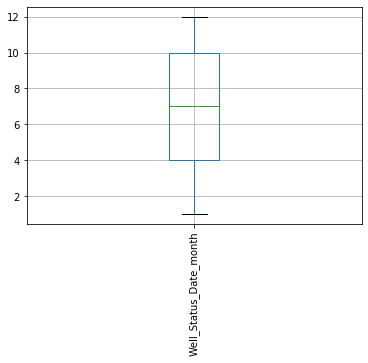

In [9]:
key=22 #4,10
print(df_dataFixedNAOutliers.keys()[key])
df_dataFixedNAOutliers.boxplot(column=df_dataFixedNAOutliers.keys()[key],rot=90, fontsize=10)
#df_data.boxplot(column=df_dataFixedNAOutliers.keys()[key],rot=90, fontsize=10)

In [10]:
df_categories_only=df_dataFixedNAOutliers.select_dtypes(include='category')
df_categories_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 33007016320000 to 33105025590000
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Current_Operator    5370 non-null   category
 1   Current_Well_Name   5370 non-null   category
 2   Lease_Name          5370 non-null   category
 3   Lease_Number        5367 non-null   category
 4   Original_Operator   5370 non-null   category
 5   Original_Well_Name  5370 non-null   category
 6   County_Name         5370 non-null   category
 7   Township            5370 non-null   category
 8   Range               5370 non-null   category
 9   QQ                  5370 non-null   category
 10  Footages            5370 non-null   category
 11  Field_Name          5370 non-null   category
 12  Produced_Pools      5370 non-null   category
 13  Wellbore            5365 non-null   category
 14  Well_Type           5370 non-null   category
 15  Well_Status    

In [11]:
var='Well_Status'
print(len(df_categories_only[var].unique()))
df_categories_only[var].value_counts()

6


A      5174
IA      186
PA        4
AB        3
TA        2
DRL       1
Name: Well_Status, dtype: int64

In [12]:
#simple emcoding
df_categories_only['Well_Status_encod'] = df_categories_only['Well_Status'].cat.codes

C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
var='Wellbore'
print(len(df_categories_only[var].unique()))
df_categories_only[var].value_counts()

5


HORIZONTAL             5337
VERTICAL                 15
DIRECTIONAL              12
HORIZONTAL RE-ENTRY       1
Name: Wellbore, dtype: int64

In [14]:
#simple emcoding
df_categories_only['Wellbore_encod'] = df_categories_only['Wellbore'].cat.codes

C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
#converting category types to interger
df_categories_only['Range_encod'] = df_categories_only['Range'].str.replace(' W', '').astype('int64')
print(len(df_categories_only['Range_encod'].unique()))
print(df_categories_only['Range_encod'].unique())

17
[ 99 101 100 102  98  92  93  90  94  91  95  96  97 103 104 105  89]


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_categories_only['Township_encod']  = df_categories_only['Township'].str.replace(' N', '').astype('int64')
print(len(df_categories_only['Township_encod'].unique()))
print(df_categories_only['Township_encod'].unique())

27
[142 141 143 144 140 139 159 160 161 162 163 164 146 145 147 148 149 150
 154 153 152 151 156 155 157 158 137]


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_categories_only['Current_Operator_encod'] = df_categories_only['Current_Operator'].cat.codes
print(len(df_categories_only['Current_Operator_encod'].unique()))
#print(df_categories_only['Current_Operator'].unique())

46


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
#simple encoding for category types
df_categories_only['Original_Operator_encod'] = df_categories_only['Original_Operator'].cat.codes
print(len(df_categories_only['Original_Operator_encod'].unique()))

79


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#simple encoding for category types
df_categories_only['Lease_Name_encod'] = df_categories_only['Lease_Name'].cat.codes
print(len(df_categories_only['Lease_Name_encod'].unique()))

2922


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
#simple encoding for category types
df_categories_only['Lease_Name_encod'] = df_categories_only['Lease_Name'].cat.codes
print(len(df_categories_only['Lease_Name_encod'].unique()))
df_categories_only['Lease_Number_encod'] = df_categories_only['Lease_Number'].cat.codes
print(len(df_categories_only['Lease_Number_encod'].unique()))

2922
3610


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
df_categories_only[var].unique()

[HORIZONTAL, HORIZONTAL RE-ENTRY, DIRECTIONAL, VERTICAL, NaN]
Categories (4, object): [HORIZONTAL, HORIZONTAL RE-ENTRY, DIRECTIONAL, VERTICAL]

In [22]:
var='County_Name'
print(len(df_categories_only[var].unique()))
df_categories_only[var].value_counts()

11


MCKENZIE         1383
MOUNTRAIL        1273
WILLIAMS          958
DUNN              899
DIVIDE            397
BURKE             171
STARK             134
BILLINGS           90
MCLEAN             35
GOLDEN VALLEY      29
MERCER              1
RENVILLE            0
BOTTINEAU           0
Name: County_Name, dtype: int64

In [23]:
#simple encoding for category types
df_categories_only['County_Name_encod'] = df_categories_only['County_Name'].cat.codes
print(len(df_categories_only['County_Name_encod'].unique()))

11


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
#simple encoding for category types
df_categories_only['QQ_encod'] = df_categories_only['QQ'].cat.codes
print(len(df_categories_only['QQ_encod'].unique()))

43


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#simple encoding for category types
df_categories_only['Field_Name_encod'] = df_categories_only['Field_Name'].cat.codes
print(len(df_categories_only['Field_Name_encod'].unique()))

326


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
var='Produced_Pools'
print(len(df_categories_only[var].unique()))
df_categories_only[var].value_counts()

9


BAKKEN                5261
SANISH                  51
RED RIVER               26
BAKKEN/THREE FORKS      26
THREE FORKS              2
MADISON,TYLER            1
LODGEPOLE                1
DUPEROW                  1
BIRDBEAR                 1
TYLER                    0
SPEARFISH/MADISON        0
SPEARFISH                0
ORDOVICIAN               0
MADISON                  0
DUPEROW,MADISON          0
Name: Produced_Pools, dtype: int64

In [27]:
#simple encoding for category types
print(len(df_categories_only['Produced_Pools'].unique()))
print(df_categories_only['Produced_Pools'].unique())

9
[BAKKEN, THREE FORKS, RED RIVER, BAKKEN/THREE FORKS, SANISH, BIRDBEAR, LODGEPOLE, DUPEROW, MADISON,TYLER]
Categories (9, object): [BAKKEN, THREE FORKS, RED RIVER, BAKKEN/THREE FORKS, ..., BIRDBEAR, LODGEPOLE, DUPEROW, MADISON,TYLER]


In [28]:
#one-hot encoding
print(df_categories_only['Produced_Pools'].value_counts())
Produced_Pools_onehot = pd.get_dummies(df_categories_only['Produced_Pools'], columns=['Produced_Pools'], prefix = 'Produced_Pools')
Produced_Pools_onehot

BAKKEN                5261
SANISH                  51
RED RIVER               26
BAKKEN/THREE FORKS      26
THREE FORKS              2
MADISON,TYLER            1
LODGEPOLE                1
DUPEROW                  1
BIRDBEAR                 1
TYLER                    0
SPEARFISH/MADISON        0
SPEARFISH                0
ORDOVICIAN               0
MADISON                  0
DUPEROW,MADISON          0
Name: Produced_Pools, dtype: int64


,Produced_Pools_BAKKEN,Produced_Pools_BAKKEN/THREE FORKS,Produced_Pools_BIRDBEAR,Produced_Pools_DUPEROW,"Produced_Pools_DUPEROW,MADISON",Produced_Pools_LODGEPOLE,Produced_Pools_MADISON,"Produced_Pools_MADISON,TYLER",Produced_Pools_ORDOVICIAN,Produced_Pools_RED RIVER,Produced_Pools_SANISH,Produced_Pools_SPEARFISH,Produced_Pools_SPEARFISH/MADISON,Produced_Pools_THREE FORKS,Produced_Pools_TYLER
api,,,,,,,,,,,,,,,
33007016320000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33007016410000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33007016470000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33007016500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33007016510000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105022070000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33105022840000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33105024670000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
#merging with one-hot encodings
df_categories_only_and_encod=pd.concat([df_categories_only,Produced_Pools_onehot],axis=1)
df_categories_only_and_encod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 33007016320000 to 33105025590000
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Current_Operator                   5370 non-null   category
 1   Current_Well_Name                  5370 non-null   category
 2   Lease_Name                         5370 non-null   category
 3   Lease_Number                       5367 non-null   category
 4   Original_Operator                  5370 non-null   category
 5   Original_Well_Name                 5370 non-null   category
 6   County_Name                        5370 non-null   category
 7   Township                           5370 non-null   category
 8   Range                              5370 non-null   category
 9   QQ                                 5370 non-null   category
 10  Footages                           5370 non-null   category
 11  Field_Name          

In [30]:
#merging all data back together and removing categories
df_dataFixed = df_dataFixedNAOutliers.merge(df_categories_only_and_encod,left_index=True, right_index=True)
df_dataFixed = df_dataFixed.select_dtypes(exclude='category')

In [31]:
#clean data set for analysis
dataAnalysis=df_dataFixed.copy()

In [32]:
dataAnalysis.describe()

,bottom,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,max_treat_rate,propp_lbs,...,Produced_Pools_LODGEPOLE,Produced_Pools_MADISON,"Produced_Pools_MADISON,TYLER",Produced_Pools_ORDOVICIAN,Produced_Pools_RED RIVER,Produced_Pools_SANISH,Produced_Pools_SPEARFISH,Produced_Pools_SPEARFISH/MADISON,Produced_Pools_THREE FORKS,Produced_Pools_TYLER
count,5370.000000,5370.000000,5370.000000,5.370000e+03,5370.000000,5370.000000,5370.000000,5370.00000,5370.000000,5.370000e+03,...,5370.000000,5370.0,5370.000000,5370.0,5370.000000,5370.000000,5370.0,5370.0,5370.000000,5370.0
mean,19424.424209,49014.859218,5.717318,2.058626e+06,261.320112,3342.955493,8727.339106,7563.13054,33.407058,2.630058e+06,...,0.000186,0.0,0.000186,0.0,0.004842,0.009497,0.0,0.0,0.000372,0.0
std,2093.418472,23462.546120,8.345926,9.854260e+05,353.738982,4062.701460,1914.504407,2356.93023,16.099407,1.172218e+06,...,0.013646,0.0,0.013646,0.0,0.069420,0.096999,0.0,0.0,0.019297,0.0
min,9530.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,6.000000,0.00000,0.000000,0.000000e+00,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,18912.250000,31141.250000,3.000000,1.307932e+06,167.000000,304.000000,8736.250000,7320.50000,30.300000,1.894481e+06,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
50%,20133.000000,47862.000000,5.000000,2.010204e+06,231.000000,355.000000,9346.000000,8260.00000,36.000000,2.610980e+06,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
75%,20720.000000,63349.250000,7.000000,2.660668e+06,308.750000,8840.000000,9686.750000,8840.00000,41.200000,3.339392e+06,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
max,26908.000000,178479.000000,463.000000,7.496118e+06,19470.000000,12636.000000,19562.000000,12132.00000,153.400000,1.276420e+07,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0


In [33]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 33007016320000 to 33105025590000
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bottom                             5370 non-null   int64  
 1   fluid_bbl                          5370 non-null   int64  
 2   fluid_bbl_per_ft                   5370 non-null   int64  
 3   fluid_gal                          5370 non-null   int64  
 4   fluid_gal_per_ft                   5370 non-null   int64  
 5   ft_per_stage                       5370 non-null   int64  
 6   lateral_length                     5370 non-null   int64  
 7   max_treat_press                    5370 non-null   int64  
 8   max_treat_rate                     5370 non-null   float64
 9   propp_lbs                          5370 non-null   int64  
 10  propp_lbs_per_ft                   5370 non-null   int64  
 11  stages                           

In [34]:
 dataAnalysis.to_csv('DataWrangling_dataset_forML.csv')